<a href="https://colab.research.google.com/github/deepan-31/ML-lab-programs-19CSE305-/blob/main/knearestneighbours_2_12_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
from sklearn.datasets import make_blobs

In [21]:
X,y = make_blobs(n_samples=300,centers=3,n_features=2)

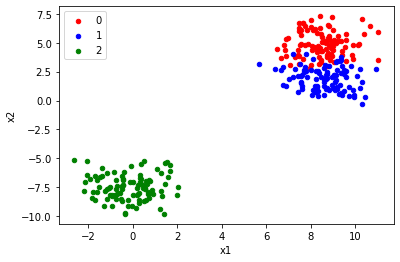

In [22]:
df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1],label=y))
colors = {0:'red', 1:'blue',2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
plt.show()

In [23]:
df.head(5)

,x1,x2,label
0,-0.025831,-9.130950,2
1,1.662861,-6.104368,2
2,0.577369,-6.916546,2
3,-0.459298,-7.263454,2
4,0.354337,-7.257417,2


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x = df.iloc[:,:2]
y = df.iloc[:,2]

In [26]:
print(f"{x.shape}")
print(f"{y.shape}")

(300, 2)
(300,)


In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
from sklearn.neighbors import KNeighborsClassifier 

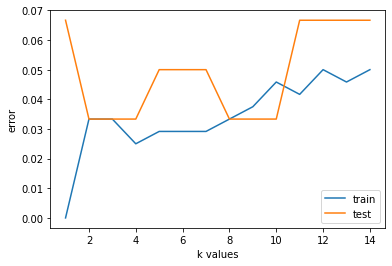

In [30]:
error1 = []
error2 = []
for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred1 = knn.predict(x_train)
    error1.append(np.mean(y_train!=y_pred1))
    y_pred2 = knn.predict(x_test)
    error2.append(np.mean(y_test!=y_pred2))

plt.plot(range(1,15),error1,label='train')
plt.plot(range(1,15),error2,label='test')
plt.xlabel('k values')
plt.ylabel('error')
plt.legend()
plt.show()

In [32]:
knn1 = KNeighborsClassifier(n_neighbors = 3)

In [33]:
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
knn1.score(x_test,y_test)

0.9666666666666667

In [37]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  3,  0],
       [ 1, 16,  0],
       [ 0,  0, 24]])

Text(42.0, 0.5, 'Truth')

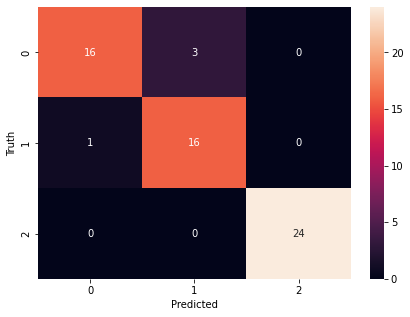

In [40]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        19
           1       0.84      0.94      0.89        17
           2       1.00      1.00      1.00        24

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60

